# TELUS-IEEE Surrey Datathon
## Team: Mohan Noolu, Sri Raghu Malireddi
### Project: Analysis of Surrey Collisions Data
### In this report, we are analysing the collisions that occured in the city of Surrey for the past 6 years and analysed the correlation between the Surrey's Weather and Collisions data. We finally came with an algorithm that can predict the probable accidents with respect to weather with 78.9% accuracy.

#### Task 1: Import necessary packages

In [85]:
import urllib2, cStringIO
import json
from PIL import Image
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import urllib, simplejson
import requests
import StringIO
import time
import warnings
warnings.filterwarnings('ignore')

from dateutil import parser, rrule
from datetime import datetime, time, date
import io

### For this work, we acquired datasets from <http://data.surrey.ca/dataset> site and we did some intial pre processing steps to generate the data that we will be working from now onwards.

#### Task 2: Importing the datasets into pandas dataframes

In [35]:
# Reading the data
df2011 = pd.read_csv('./collisions_2011.csv')
df2012 = pd.read_csv('./collisions_2012.csv')
df2013 = pd.read_csv('./collisions_2013.csv')
df2014 = pd.read_csv('./collisions_2014.csv')
df2015 = pd.read_csv('./collisions_2015.csv')
df2016 = pd.read_csv('./collisions_2016.csv')

### Now let us analyze the frequency of accidents for each month in the year of 2011.

[1926, 1661, 1931, 1825, 1639, 1575, 1695, 1817, 1658, 1734, 1591, 1657] ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


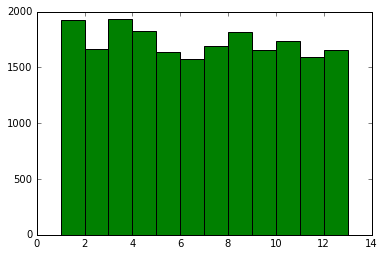

In [86]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
for i in df2011['MONTH']:
    freq[i-1] += 1
print freq,months
plt.bar(month, freq, 1, color='g')
plt.show()

In [37]:
years = []
months = []
for year in range(2011,2017):
    if year==2011:
        for month in range(11,13):
            years.append(year)
            months.append(month)
    else:
        if year==2016:
            for month in range(1,11):
                years.append(year)
                months.append(month)
        else:
            for month in range(1,13):
                years.append(year)
                months.append(month)      

In [38]:
collisions = pd.DataFrame()
collisions['year'] = years
collisions['month'] = months

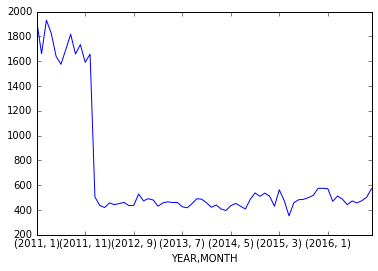

In [87]:
df = pd.concat([df2011, df2012, df2013, df2014, df2015, df2016],ignore_index=True)
df.drop(['CRIME_TYPE','INCIDENT_TYPE','Latitude','Longitude','ROAD_NAME','HUNDRED_BLOCK'], axis=1, inplace=True)
df['freq'] = 1
df = df.groupby(['YEAR','MONTH']).sum()
df['freq'].plot()
plt.show()

In [40]:
df = df.ix[10:]
df.to_csv('monthly_collisions.csv')

In [41]:
collisions = pd.read_csv('monthly_collisions.csv')
weather = pd.read_csv('IPEFLATR2_weather_monthly.csv')

In [42]:
weather = weather.ix[0:len(weather)-2]

In [43]:
print len(weather), len(collisions)

60 60


In [44]:
data = weather.copy()
data['accidents'] = collisions['freq']
data.to_csv('weather_collisions.csv')

In [45]:
data = pd.read_csv('weather_collisions.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,year,month,temp,rain,avg_rain,humidity,wind,accidents
0,2011,11,5.842292,0.356879,49.296871,80.557482,9.755371,1591
1,2011,12,0.492736,0.184930,1.968702,77.957883,8.793547,1657
2,2012,1,-3.678945,0.088905,1.645771,81.344929,11.405969,505
3,2012,2,-5.631785,0.086330,1.490236,78.015488,6.466599,436
4,2012,3,-0.011905,0.028822,0.431078,76.829574,7.124812,420
5,2012,4,5.921790,0.075147,1.036985,74.991755,9.835218,457
6,2012,5,11.448898,0.055719,0.721196,75.357817,7.127492,443
7,2012,6,14.738755,0.038882,0.328081,81.231258,6.711182,452
8,2012,7,19.836848,0.065816,0.732630,75.928968,6.626970,461
9,2012,8,20.651068,0.062816,0.861195,77.340981,7.329668,436


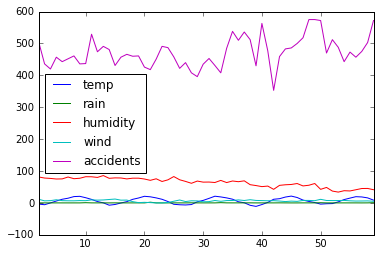

In [88]:
data[['temp','rain','humidity','wind','accidents']].plot()
plt.show()

In [47]:
# Normalize the data
data = data.ix[2:]
data_norm = (data - data.mean()) / (data.max() - data.min())
data_norm['year'] = data['year']
data_norm['month'] = data['month']

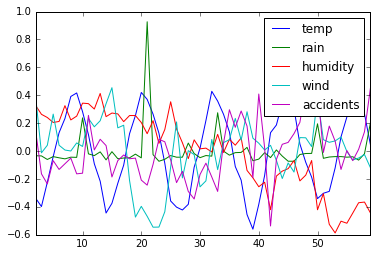

In [89]:
data_norm[['temp','rain','humidity','wind','accidents']].plot()
plt.show()

In [49]:
from scipy.stats import pearsonr
print pearsonr(data_norm['temp'], data_norm['accidents'])
print pearsonr(data_norm['avg_rain'], data_norm['accidents'])
print pearsonr(data_norm['humidity'], data_norm['accidents'])
print pearsonr(data_norm['wind'], data_norm['accidents'])

(-0.16343323118110648, 0.22025980197144343)
(0.0097863263277556314, 0.94187796187487316)
(-0.25682800148796031, 0.05163722948109134)
(0.21693688372065228, 0.101897916357763)


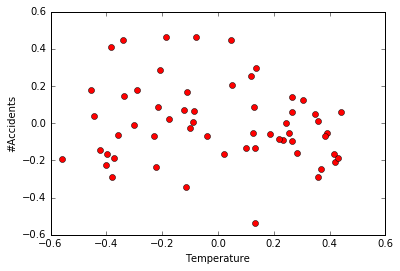

In [90]:
plt.plot(data_norm['temp'], data_norm['accidents'], 'ro')
plt.xlabel('Temperature')
plt.ylabel('#Accidents')
plt.show()

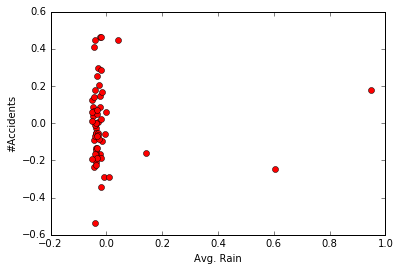

In [91]:
plt.plot(data_norm['avg_rain'], data_norm['accidents'], 'ro')
plt.xlabel('Avg. Rain')
plt.ylabel('#Accidents')
plt.show()

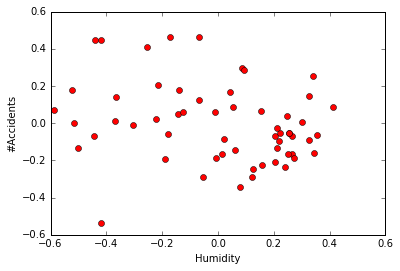

In [92]:
plt.plot(data_norm['humidity'], data_norm['accidents'], 'ro')
plt.xlabel('Humidity')
plt.ylabel('#Accidents')
plt.show()

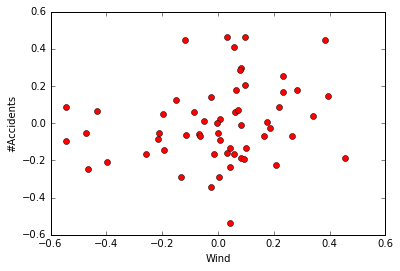

In [93]:
plt.plot(data_norm['wind'], data_norm['accidents'], 'ro')
plt.xlabel('Wind')
plt.ylabel('#Accidents')
plt.show()

In [54]:
train = data.copy()
train.drop(['year','rain','accidents'],axis=1,inplace=True)
test = data_norm.accidents
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.1, random_state=33)

In [55]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [56]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)
    
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y, y_pred)),"\n"

In [57]:
# Linear Model
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
measure_performance(X_test, y_test, clf_sgd, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 0.234954534702
Average coefficient of determination using 5-fold crossvalidation: 0.0558493412736
Coefficient of determination:0.069 



In [58]:
# Linear Model
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
measure_performance(X_test, y_test, clf_sgd, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 0.234948184326
Average coefficient of determination using 5-fold crossvalidation: 0.0558433201057
Coefficient of determination:0.069 



In [59]:
from sklearn import svm
clf_svr = svm.SVR(kernel='linear')
train_and_evaluate(clf_svr, X_train, y_train)
measure_performance(X_test, y_test, clf_svr, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 0.352499820498
Average coefficient of determination using 5-fold crossvalidation: 0.0943475312894
Coefficient of determination:0.483 



In [60]:
clf_svr_poly = svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly, X_train, y_train)
measure_performance(X_test, y_test, clf_svr_poly, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 0.385449609054
Average coefficient of determination using 5-fold crossvalidation: -0.280557715301
Coefficient of determination:0.387 



In [61]:
clf_svr_rbf = svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf, X_train, y_train)
measure_performance(X_test, y_test, clf_svr_rbf, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 0.561544420963
Average coefficient of determination using 5-fold crossvalidation: 0.131283773871
Coefficient of determination:0.603 



In [84]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=20,random_state=73)
train_and_evaluate(clf_et, X_train, y_train)
measure_performance(X_test, y_test, clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.0976659821275
Coefficient of determination:0.789 



In [63]:
print zip(clf_et.feature_importances_, list(train.columns.values))

[(0.33555883687025045, 'month'), (0.14078594250192281, 'temp'), (0.12639162083247277, 'avg_rain'), (0.24037584402807552, 'humidity'), (0.1568877557672784, 'wind')]
